<a href="https://colab.research.google.com/github/krishna663-wq/Machine_Learning/blob/main/Course_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/udemy_course_data.csv')

In [7]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [8]:
df.isnull()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3679,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3680,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3681,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df= df.drop_duplicates()
df = df.dropna(subset=['course_title','subject','level','price','num_subscribers'])
df['price'] = df['price'].replace('Free',0).astype(float)
df['profit'] = df['num_subscribers'] - df['price']

try:
  # Replace 'error' with 'errors' and remove format='ISO8601'
  df['published_timestamp'] = pd.to_datetime(df['published_timestamp'], errors='raise')
except ValueError:
  df['published_year'] = pd.to_datetime(df['published_timestamp'],errors='coerce')

df['published_date'] = df['published_timestamp'].dt.date
df['year'] = df['published_timestamp'].dt.year
df['month'] = df['published_timestamp'].dt.month
df['day'] = df['published_timestamp'].dt.day
df.reset_index(drop=True,inplace=True)

AttributeError: Can only use .dt accessor with datetimelike values

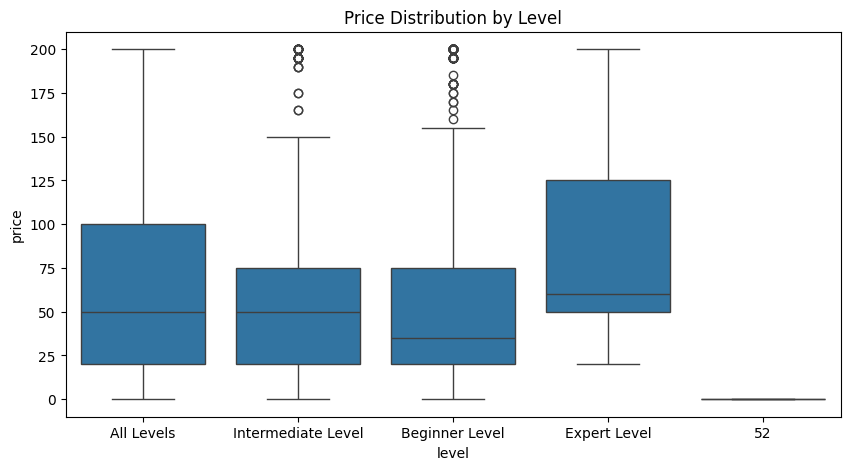

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x='level',y='price',data = df)
plt.title('Price Distribution by Level')
plt.show()


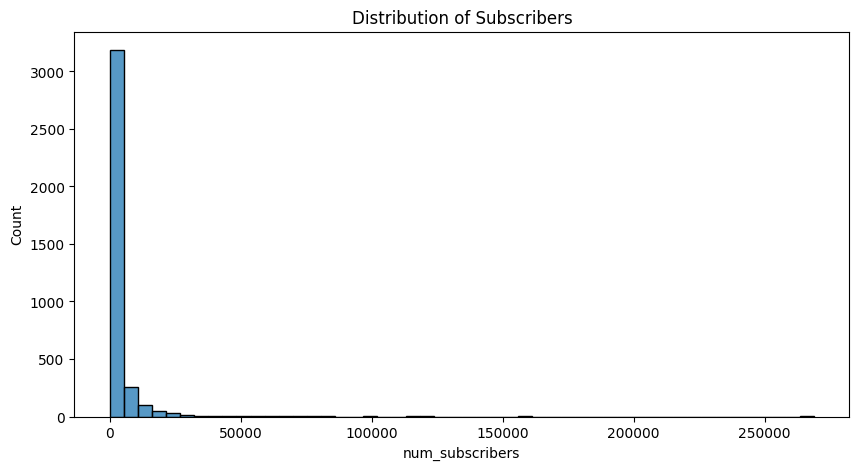

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['num_subscribers'],bins=50)
plt.title('Distribution of Subscribers')
plt.show()

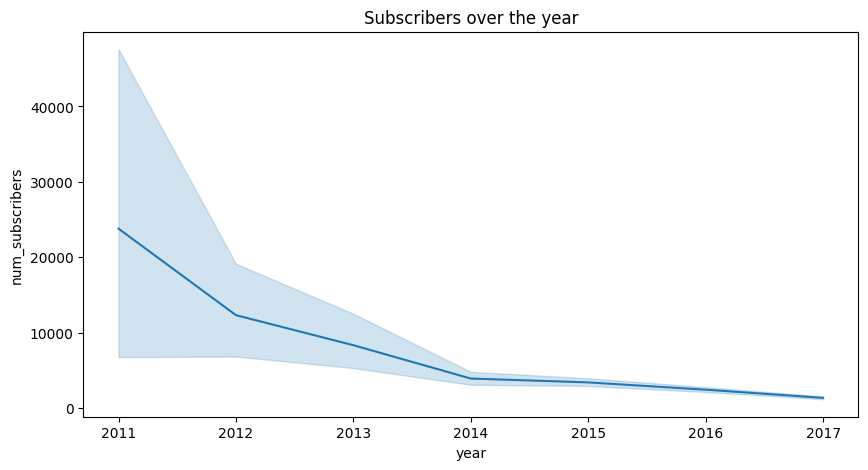

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='num_subscribers',data=df)
plt.title('Subscribers over the year')
plt.show()

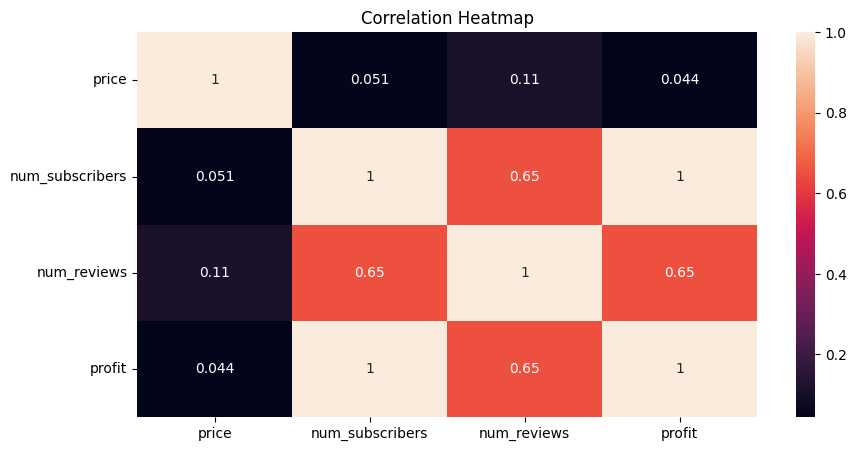

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['price','num_subscribers','num_reviews','profit']].corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

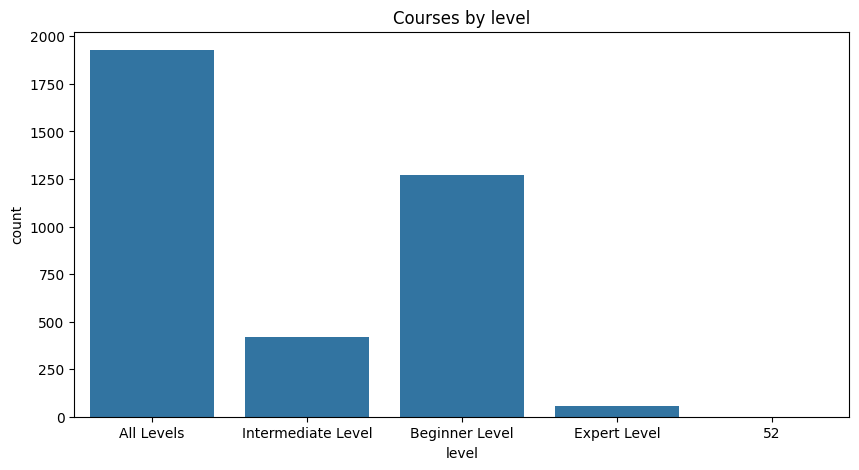

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='level',data=df)
plt.title('Courses by level')
plt.show()

In [18]:
features = df[['course_title','subject','level']]

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [23]:
df['combined'] = df['course_title'] + ' ' + df['subject'] + ' ' + df['level']
tfdf = TfidfVectorizer(stop_words='english')
tfdf_matrix = tfdf.fit_transform(df['combined'])

# Changed 'tfid_matrix' to 'tfdf_matrix'
cosine_sin = linear_kernel(tfdf_matrix,tfdf_matrix)

indices = pd.Series(df.index,index=df['course_title']).drop_duplicates()

In [25]:
def recommend_courses(title, cosine_sin=cosine_sin):
    title = title.strip().lower()

    idx = indices[indices.index.str.strip().str.lower() == title]

    if idx.empty:
        print(f"Course title '{title}' not found in the dataset.")
        return pd.DataFrame()
    else: # Add an else block to ensure idx is defined
        idx = idx.iloc[0]
        sim_scores = list(enumerate(cosine_sin[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:6]
        course_indices = [i[0] for i in sim_scores]
        return df[['course_title', 'subject', 'level']].iloc[course_indices]

In [26]:
sample_titles = df['course_title'].sample(3).values
for title in sample_titles:
    print(f"Recommended courses for '{title}':")
    print(recommend_courses(title))

Recommended courses for 'Master Class # 11:  Play Piano Techniques Learn Piano 1 to10':
                                           course_title              subject  \
2052  #6 Piano Hand Coordination: Play Open 10 Balla...  Musical Instruments   
1921  #1 Piano Hand Coordination: Play 10th Ballad i...  Musical Instruments   
1998  #12 Hand Coordination: Let your Hands dance wi...  Musical Instruments   
2038  #4 Piano Hand Coordination: Fun Piano Runs in ...  Musical Instruments   
2035  #5  Piano Hand Coordination:  Piano Runs in 2 ...  Musical Instruments   

                   level  
2052  Intermediate Level  
1921          All Levels  
1998  Intermediate Level  
2038  Intermediate Level  
2035  Intermediate Level  
Recommended courses for 'HTTP Clients with Laravel: Use and Consume Services and APIs':
                                           course_title          subject  \
2541               Learn JavaScript for Web Development  Web Development   
2631  JavaScript For Beginner

In [28]:
import pickle
with open('tfidf_vectorizer.pkl','wb') as f:
  # Changed 'tfidf' to 'tfdf'
  pickle.dump(tfdf,f)

with open('cosine_similarity.pkl','wb') as f:
  # Changed 'cosine_sim' to 'cosine_sin'
  pickle.dump(cosine_sin,f)

df.to_csv('processed_course_data.csv',index=False)
